In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
city_df = pd.read_csv("../Resources/city_data.csv")
ride_df = pd.read_csv("../Resources/ride_data.csv")

In [13]:
#Merge original data
city_ride_df = ride_df.merge(city_df, how='outer', on='city')

#Make frames of the needed data

#Frame of average fare per city
avg_fare_per_city = round(city_ride_df.groupby(['type', 'city'])['fare'].mean()).reset_index()
avg_fare_per_city.set_index('city', inplace=True)
avg_fare_per_city.rename(columns={'fare': 'Average fare ($)'}, inplace=True)
avg_fare_per_city.drop(columns='type', inplace=True)

#Frame of total rides per city
total_rides_per_city = city_ride_df.groupby(['type', 'city'])['ride_id'].count().reset_index()
total_rides_per_city.set_index('city', inplace=True)
total_rides_per_city.rename(columns={'ride_id': 'Total Number of Rides (Per City)'}, inplace=True)
total_rides_per_city.drop(columns='type', inplace=True)

#Frame of driver count per city
driver_count_per_city = city_ride_df.groupby(['type', 'city'])['driver_count'].min().reset_index()
driver_count_per_city.set_index('city', inplace=True)
driver_count_per_city.rename(columns={'driver_count': 'driver count'}, inplace=True)

#Merge stats we need into one frame
city_ride_merged = driver_count_per_city.merge(total_rides_per_city, on='city').merge(avg_fare_per_city, on='city')
city_ride_merged.reset_index()

#separate by city type so they can be plotted easily
urban_df = city_ride_merged[city_ride_merged.type == 'Urban']
suburban_df = city_ride_merged[city_ride_merged.type == 'Suburban']
rural_df = city_ride_merged[city_ride_merged.type == 'Rural']

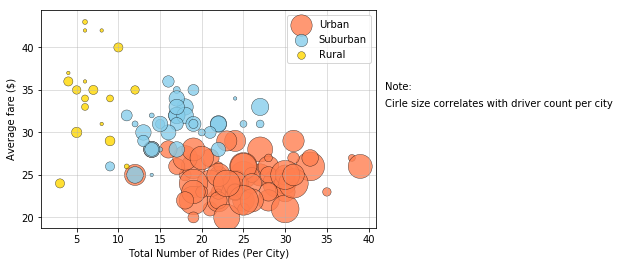

In [12]:
#Plot our frames to a bubble chart
urban_plot = plt.scatter(urban_df['Total Number of Rides (Per City)'], urban_df['Average fare ($)'], s=urban_df['driver count']*12, \
            marker='o', color='Coral', linewidths=0.4, edgecolors='black', alpha=0.8, label='Urban')

suburban_plot = plt.scatter(suburban_df['Total Number of Rides (Per City)'], suburban_df['Average fare ($)'], s=suburban_df['driver count']*12, \
            marker='o', color='SkyBlue', linewidths=0.4, edgecolors='black',alpha=0.8, label='Suburban')

rural_plot = plt.scatter(rural_df['Total Number of Rides (Per City)'], rural_df['Average fare ($)'], s=rural_df['driver count']*12, \
            marker='o', color='Gold', linewidths=0.4, edgecolors='black',alpha=0.8, label='Rural')

plt.text(42, 35, 'Note:')
plt.text(42, 33, 'Cirle size correlates with driver count per city')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average fare ($)')
plt.legend(handles=[urban_plot, suburban_plot, rural_plot], loc="best")
plt.grid(alpha=0.5)
plt.show()
